In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Lee el archivo 'victimas.csv'
df_victimas = pd.read_csv(r'datasets\datos_limpios\victimas.csv')

# Lee el archivo 'hechos.csv'
df_hechos = pd.read_csv(r'datasets\datos_limpios\hechos.csv')


#### Niveles de medicion de df_victimas

- Nominal: id_hecho, ROL, VICTIMA, SEXO.

- Intervalo: FECHA, FECHA_FALLECIMIENTO.

- Razón: EDAD.

#### Niveles de medicion de df_hechos

- Nominal: id_hecho, TIPO_DE_CALLE, Dirección Normalizada, COMUNA, VICTIMA, ACUSADO.

- Intervalo: FECHA, HORA.

- Razón: N_VICTIMAS, pos x, pos y.

## 1. Análisis Univariado

> Victimas

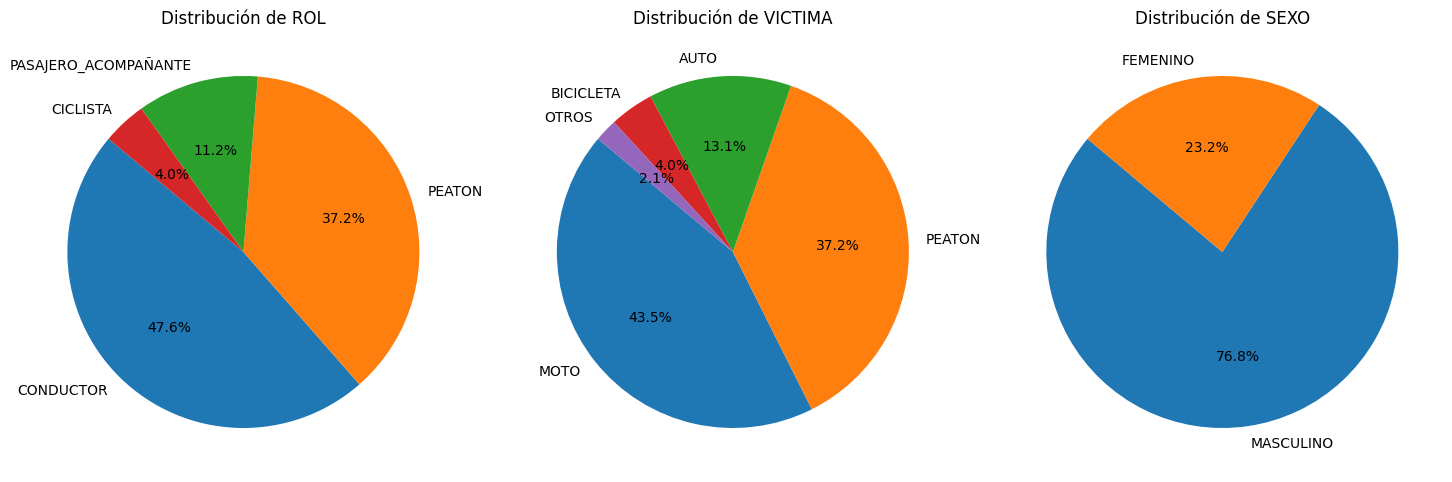

In [47]:
# df_victimas 
plt.figure(figsize=(15, 5))

# Remplazamos los valores de CARGAS, PASAJEROS y MOVIL con OTROS
df_victimas["VICTIMA"] = df_victimas["VICTIMA"].replace({"CARGAS": "OTROS", "PASAJEROS": "OTROS", "MOVIL": "OTROS"})

# Gráfico de pastel para la distribución de ROL
plt.subplot(1, 3, 1)
rol_counts = df_victimas["ROL"].value_counts()
plt.pie(rol_counts, labels=rol_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de ROL')

# Gráfico de pastel para la distribución de VICTIMA
plt.subplot(1, 3, 2)
victima_counts = df_victimas["VICTIMA"].value_counts()
plt.pie(victima_counts, labels=victima_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de VICTIMA')

# Gráfico de pastel para la distribución de SEXO
plt.subplot(1, 3, 3)
sexo_counts = df_victimas["SEXO"].value_counts()
plt.pie(sexo_counts, labels=sexo_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de SEXO')

plt.tight_layout()
plt.show()



In [9]:
df_victimas["EDAD"].describe()

count    717.000000
mean      41.267782
std       19.306213
min        1.000000
25%       28.000000
50%       35.000000
75%       55.000000
max       95.000000
Name: EDAD, dtype: float64

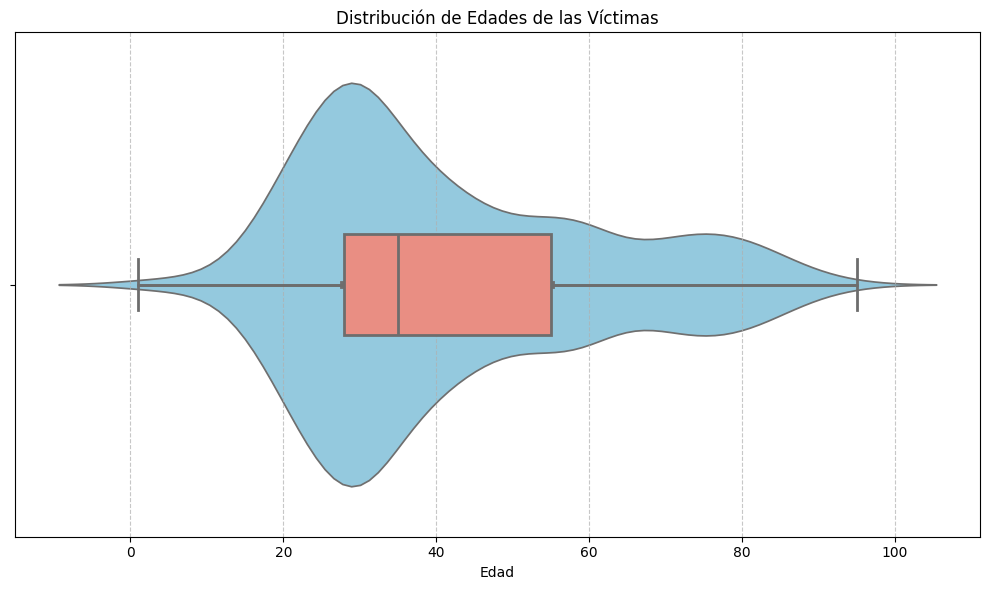

In [45]:
plt.figure(figsize=(10, 6))

# Violin plot
sns.violinplot(x=df_victimas["EDAD"], color='skyblue')

# Box plot superpuesto para resaltar los valores atípicos
sns.boxplot(x=df_victimas["EDAD"], color='salmon', width=0.2, linewidth=2)

plt.title('Distribución de Edades de las Víctimas')
plt.xlabel('Edad')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


> Hechos

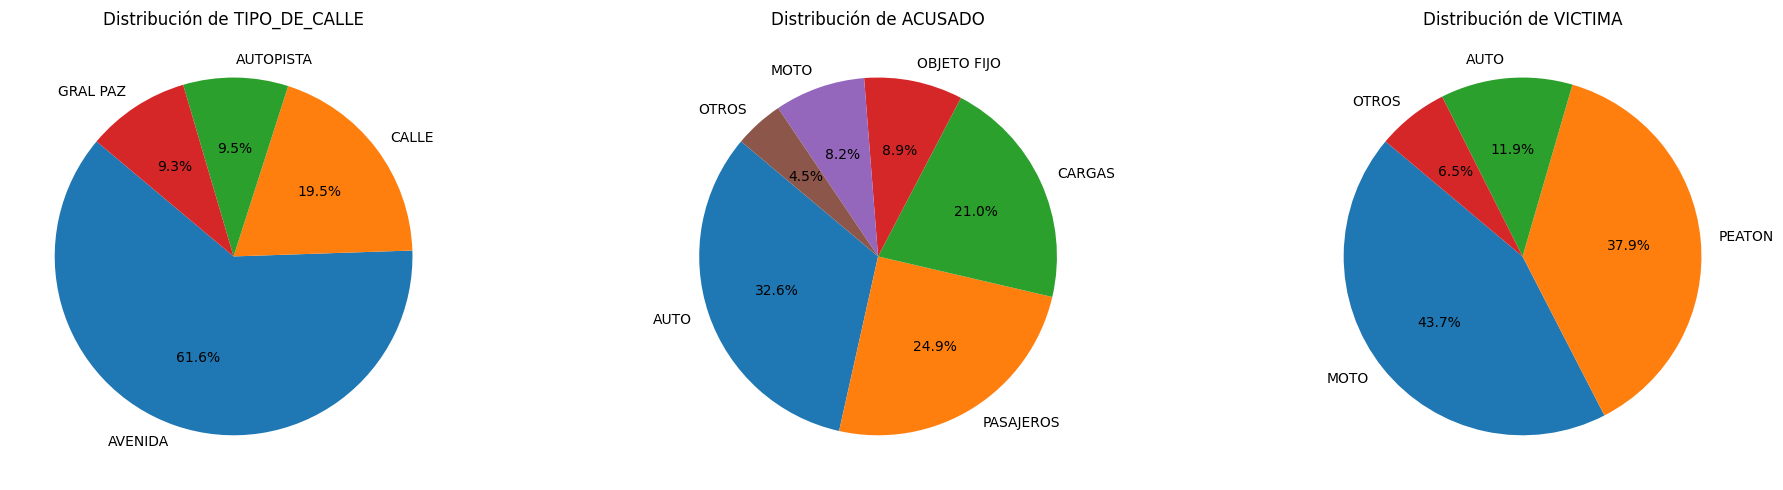

In [54]:
# Reemplazar los valores de MULTIPLE, BICICLETA, OTRO y TREN por OTROS en la columna ACUSADO
df_hechos["ACUSADO"] = df_hechos["ACUSADO"].replace({"MULTIPLE": "OTROS", "BICICLETA": "OTROS", 
                                                    "OTRO": "OTROS", "TREN": "OTROS"})

# Crear una figura y subplots
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Gráfico de pastel para la distribución de TIPO_DE_CALLE
tipo_calle_counts = df_hechos["TIPO_DE_CALLE"].value_counts()
axs[0].pie(tipo_calle_counts, labels=tipo_calle_counts.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Distribución de TIPO_DE_CALLE')

# Gráfico de pastel para la distribución de ACUSADO
acusado_counts = df_hechos["ACUSADO"].value_counts()
axs[1].pie(acusado_counts, labels=acusado_counts.index, autopct='%1.1f%%', startangle=140)
axs[1].set_title('Distribución de ACUSADO')

# Reemplazar los valores de BICICLETA, CARGAS, PASAJEROS, MOVIL, OBJETO FIJO y PEATON_MOTO por OTROS
df_hechos["VICTIMA"] = df_hechos["VICTIMA"].replace({"BICICLETA": "OTROS", "CARGAS": "OTROS", 
                                                    "PASAJEROS": "OTROS", "MOVIL": "OTROS",
                                                    "OBJETO FIJO": "OTROS", "PEATON_MOTO": "OTROS"})

# Gráfico de pastel para la distribución de VICTIMA
victima_counts = df_hechos["VICTIMA"].value_counts()
axs[2].pie(victima_counts, labels=victima_counts.index, autopct='%1.1f%%', startangle=140)
axs[2].set_title('Distribución de VICTIMA')

plt.tight_layout()
plt.show()


In [3]:
df_hechos["N_VICTIMAS"].value_counts()

N_VICTIMAS
1    676
2     19
3      1
Name: count, dtype: int64

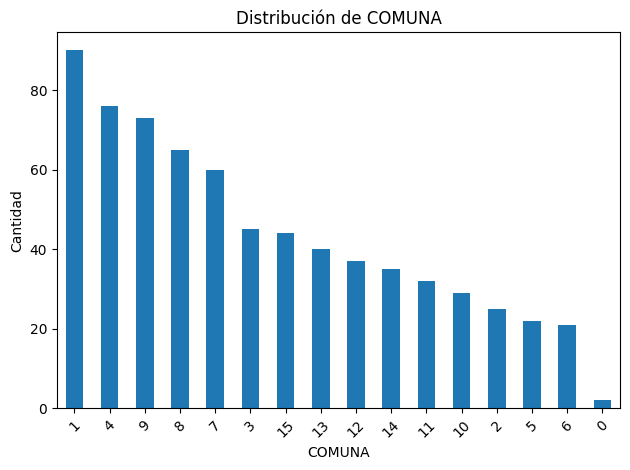

In [56]:
# Gráfico de barras para la distribución de COMUNA
comuna_counts = df_hechos["COMUNA"].value_counts()
comuna_counts.plot(kind='bar')
plt.title('Distribución de COMUNA')
plt.xlabel('COMUNA')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [5]:
diccionario_comuna_barrio = {
    1: ['Retiro', 'San Nicolás', 'Puerto Madero', 'San Telmo', 'Monserrat', 'Constitución'],
    2: ['Recoleta'],
    3: ['San Cristóbal', 'Balvanera'],
    4: ['La Boca', 'Barracas', 'Parque Patricios', 'Nueva Pompeya'],
    5: ['Almagro', 'Boedo'],
    6: ['Caballito'],
    7: ['Flores', 'Parque Chacabuco'],
    8: ['Villa Soldati', 'Villa Riachuelo', 'Villa Lugano'],
    9: ['Parque Avellaneda', 'Liniers', 'Mataderos'],
    10: ['Villa Real', 'Monte Castro', 'Versalles', 'Floresta', 'Vélez Sársfield', 'Villa Luro'],
    11: ['Villa Gral. Mitre', 'Villa Devoto', 'Villa del Parque', 'Villa Santa Rita'],
    12: ['Coghlan', 'Saavedra', 'Villa Urquiza', 'Villa Pueyrredón'],
    13: ['Belgrano', 'Núñez', 'Colegiales'],
    14: ['Palermo'],
    15: ['Chacarita', 'Villa Crespo', 'Paternal', 'Villa Ortúzar', 'Agronomía', 'Parque Chas']
}



> #### Conclusiones de analisis univariado de df_victimas y df_hechos:

* **Rol de las víctimas:**
    * La mayoría de las víctimas son conductores (341), seguidos por peatones (267) y pasajeros (80).
* **Tipo de víctima:**
    * La mayoría de las víctimas son motociclistas (312), seguidos por peatones (267) y automovilistas (94).
* **Edad de las víctimas:**
    * La edad promedio de las víctimas es de 41 años y me la mediana es de 35.
    * La edad mínima de una víctima es de 1 año y la máxima de 95 años con una desviación estándar de 19 años. Esto indica una desviacion estandar alta.
    * La distribución de la edad de las víctimas no es normal, sino que está sesgada a la derecha. Esto significa que hay más víctimas mayores que menores.
* **Sexo de las víctimas:** La mayor cantidad de victimas son de sexo masculino con un ratio de 3 a 1.

* **Tipo de calle:**
    * La mayoría de los accidentes ocurren en avenidas (429), seguidas por calles (136) y autopistas (66).
* **Comuna:**
    * La comuna con mayor número de accidentes es la 1 (90), seguida por la 4 (76) y la 9 (73).
* **Víctimas y Acusados:**
    * La mayoría de las víctimas son motociclistas (304) y los principales acusados son automovilistas (227).
    * También hay un número considerable de peatones como víctimas (264) y como acusados (173).
* **Número de víctimas:**
    * Casi la totalidad los accidentes tienen una sola víctima (676).



## 2. Análisis Bivariado:


> ### Análisis de patrones temporales en la variable FECHA

#### Metodología:

- Análisis de frecuencia: Se analizará y visualizara la frecuencia de los hechos por año, mes, día de la semana y hora del día. Esto permitirá identificar si hay una mayor incidencia de hechos en ciertos periodos.

- Pruebas de hipótesis: Se realizarán pruebas de hipótesis para determinar si las diferencias en la frecuencia de los hechos en diferentes periodos son significativas.

- Análisis de regresión: Se utilizará un modelo de regresión lineal para determinar si hay variables que influyen en la frecuencia de los hechos.

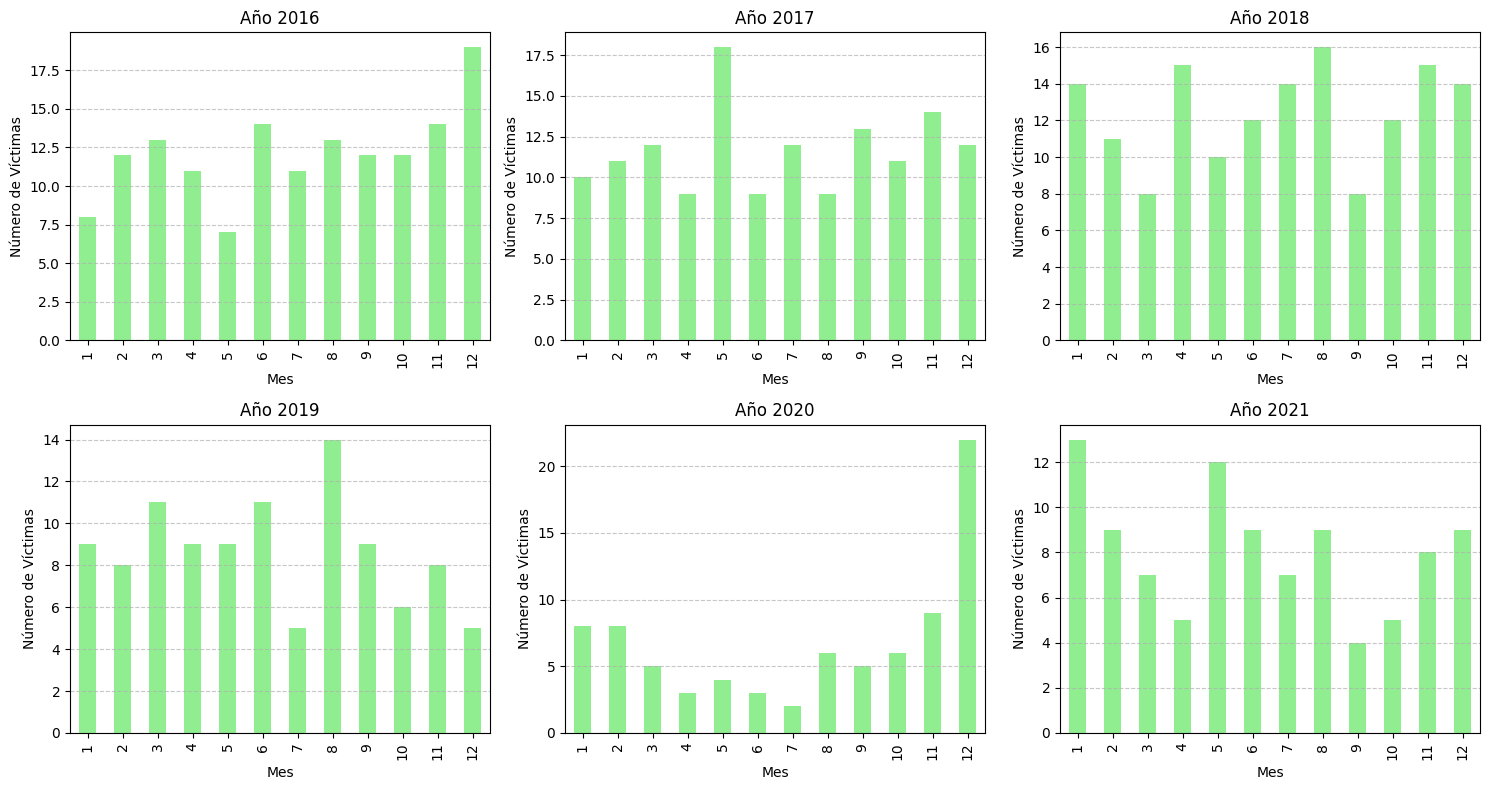

In [29]:
# Convertimos la columna "FECHA" a formato datetime
df_hechos['FECHA'] = pd.to_datetime(df_hechos['FECHA'])

# Creamos una figura y ejes para cada año
fig, axs = plt.subplots(2, 3, figsize=(15, 8))

# Iteramos sobre los años de 2016 a 2021
for año, ax in zip(range(2016, 2022), axs.flat):
    # Filtramos el DataFrame por el año específico
    df_año = df_hechos[df_hechos['FECHA'].dt.year == año]
    # Agrupamos por mes y contamos el número de víctimas en cada mes
    victimas_por_mes = df_año.groupby(df_año['FECHA'].dt.month)['N_VICTIMAS'].sum()
    # Graficamos el número de víctimas por mes
    victimas_por_mes.plot(kind='bar', color='lightgreen', ax=ax)
    ax.set_title(f'Año {año}')
    ax.set_xlabel('Mes')
    ax.set_ylabel('Número de Víctimas')
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Ajustamos el espacio entre los subgráficos
plt.tight_layout()
plt.show()

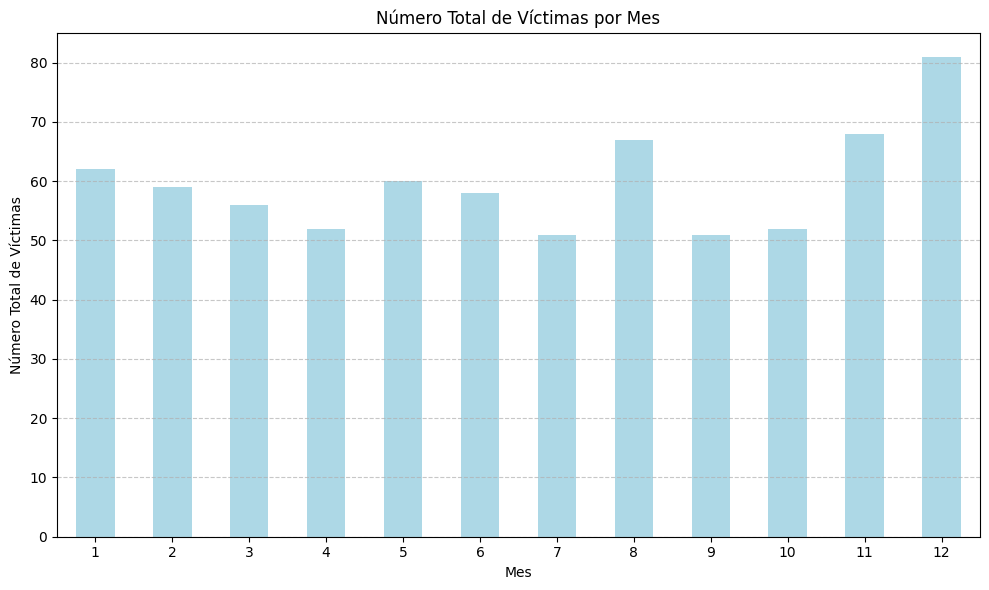

In [30]:
# Convertimos la columna "FECHA" a formato datetime
df_hechos['FECHA'] = pd.to_datetime(df_hechos['FECHA'])

# Agrupamos por mes y año y contamos el número de víctimas en cada mes
victimas_por_mes_año = df_hechos.groupby([df_hechos['FECHA'].dt.month, df_hechos['FECHA'].dt.year])['N_VICTIMAS'].sum()

# Sumamos el número total de víctimas por mes a lo largo de todos los años
victimas_por_mes_total = victimas_por_mes_año.groupby(level=0).sum()

# Graficamos el número total de víctimas por mes
plt.figure(figsize=(10, 6))
victimas_por_mes_total.plot(kind='bar', color='lightblue')
plt.title('Número Total de Víctimas por Mes')
plt.xlabel('Mes')
plt.ylabel('Número Total de Víctimas')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

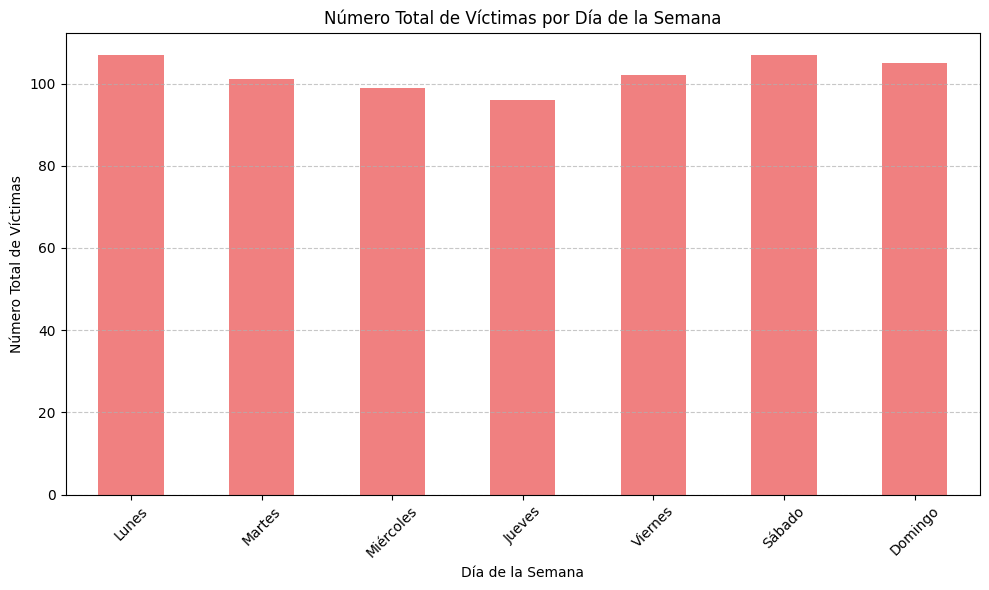

In [38]:
# Convertimos la columna "FECHA" a formato datetime
df_hechos['FECHA'] = pd.to_datetime(df_hechos['FECHA'])

# Obtenemos el nombre del día de la semana para cada fecha y lo convertimos a español
dias_semana_espanol = {
    'Monday': 'Lunes',
    'Tuesday': 'Martes',
    'Wednesday': 'Miércoles',
    'Thursday': 'Jueves',
    'Friday': 'Viernes',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}
df_hechos['DIA_SEMANA'] = df_hechos['FECHA'].dt.day_name().map(dias_semana_espanol)

# Agrupamos por día de la semana y sumamos el número de víctimas en cada día
victimas_por_dia_semana = df_hechos.groupby('DIA_SEMANA')['N_VICTIMAS'].sum()

# Reordenamos los días de la semana para que aparezcan en orden
dias_semana_ordenados = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
victimas_por_dia_semana = victimas_por_dia_semana.reindex(dias_semana_ordenados)

# Graficamos el número total de víctimas por día de la semana
plt.figure(figsize=(10, 6))
victimas_por_dia_semana.plot(kind='bar', color='lightcoral')
plt.title('Número Total de Víctimas por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Número Total de Víctimas')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


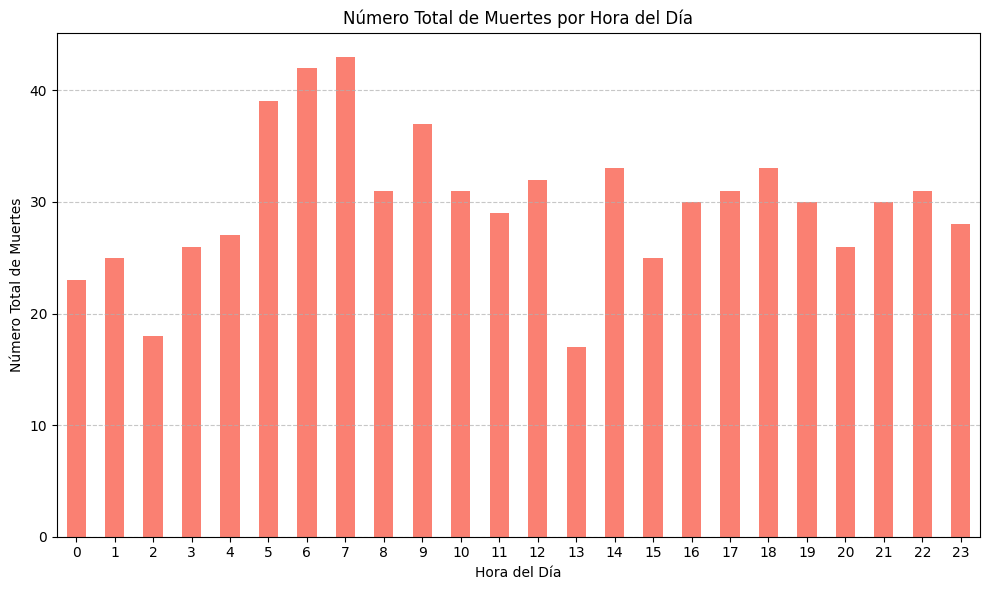

In [40]:
# Convertimos la columna "FECHA" a formato datetime
df_hechos['FECHA'] = pd.to_datetime(df_hechos['FECHA'])

# Extraemos la hora del día
df_hechos['HORA_DEL_DIA'] = df_hechos['HORA'].str.split(':').str[0].astype(int)

# Contamos el número total de muertes por hora del día
muertes_por_hora = df_hechos.groupby('HORA_DEL_DIA')['N_VICTIMAS'].sum()

# Graficamos el número total de muertes por hora del día
plt.figure(figsize=(10, 6))
muertes_por_hora.plot(kind='bar', color='salmon')
plt.title('Número Total de Muertes por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Número Total de Muertes')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

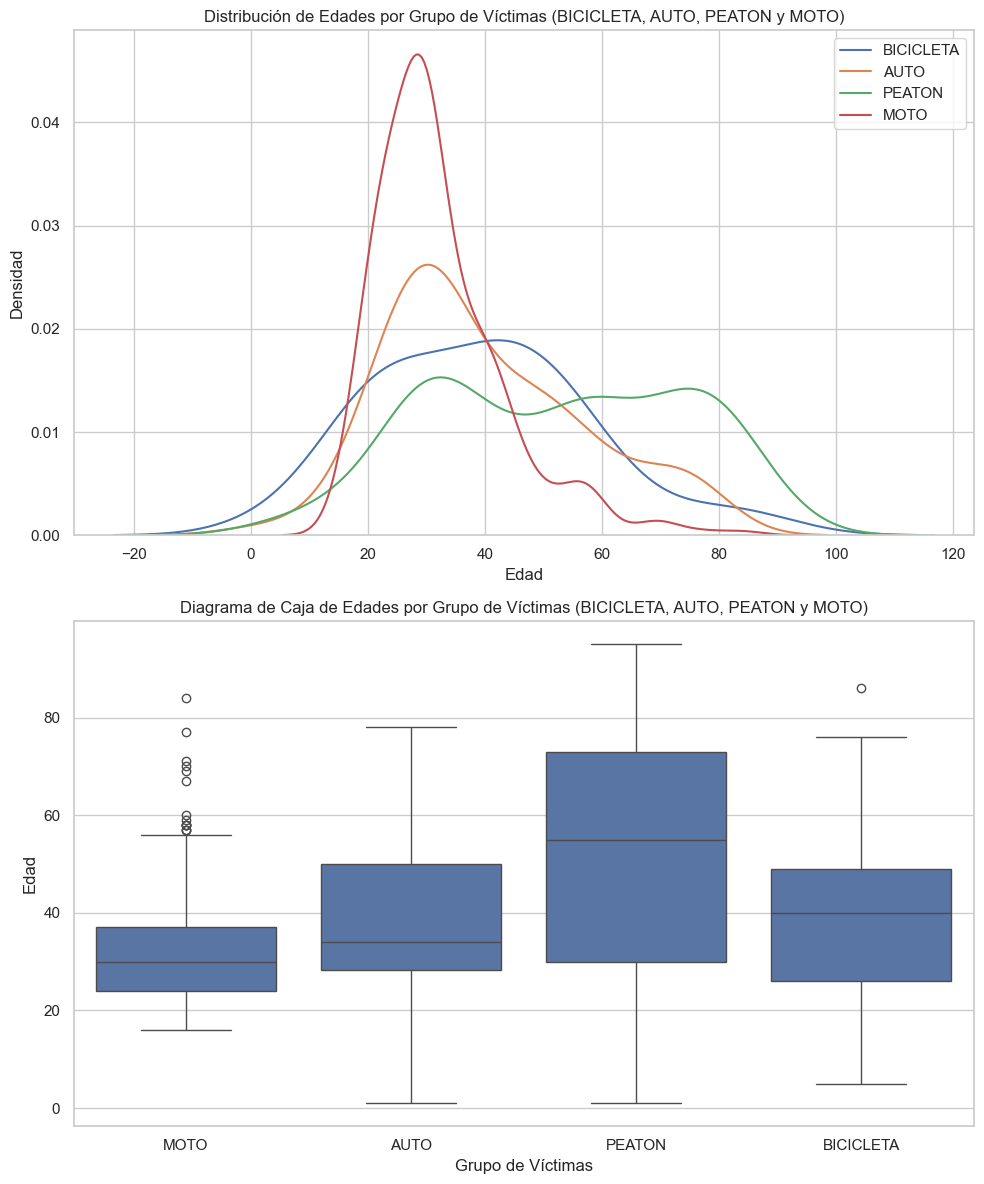

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo de seaborn
sns.set(style="whitegrid")

# Crear subgráficos solo para los grupos seleccionados
fig, axs = plt.subplots(2, figsize=(10, 12))

# Lista de grupos seleccionados
grupos_seleccionados = ["BICICLETA", "AUTO", "PEATON", "MOTO"]

# Gráficos de líneas de kernel de distribución de edades por grupo de víctimas
for grupo in grupos_seleccionados:
    edades_grupo = grupos[grupo]
    sns.kdeplot(edades_grupo, ax=axs[0], label=grupo)

axs[0].set_title('Distribución de Edades por Grupo de Víctimas (BICICLETA, AUTO, PEATON y MOTO)')
axs[0].set_xlabel('Edad')
axs[0].set_ylabel('Densidad')
axs[0].legend()

# Diagramas de caja de edades por grupo de víctimas
sns.boxplot(data=df_victimas[df_victimas['VICTIMA'].isin(grupos_seleccionados)], x='VICTIMA', y='EDAD', ax=axs[1])
axs[1].set_title('Diagrama de Caja de Edades por Grupo de Víctimas (BICICLETA, AUTO, PEATON y MOTO)')
axs[1].set_xlabel('Grupo de Víctimas')
axs[1].set_ylabel('Edad')

plt.tight_layout()
plt.show()


In [11]:
import folium
from folium.plugins import MarkerCluster

# Convertir las coordenadas a valores numéricos
df_hechos['pos x'] = pd.to_numeric(df_hechos['pos x'], errors='coerce')
df_hechos['pos y'] = pd.to_numeric(df_hechos['pos y'], errors='coerce')


In [12]:
df_hechos.isna().sum() # Existen valores donde no hay informacion de las cordenadas

id_hecho                  0
N_VICTIMAS                0
FECHA                     0
HORA                      0
TIPO_DE_CALLE             0
Dirección Normalizada     0
COMUNA                    0
pos x                    12
pos y                    12
VICTIMA                   0
ACUSADO                   0
dtype: int64

In [14]:
import folium
from folium.plugins import MarkerCluster

# Filtrar filas que no contienen NaN en las columnas de coordenadas
df_hechos_filtered = df_hechos.dropna(subset=['pos x', 'pos y'])

# Crear un mapa centrado en un punto de referencia
mapa = folium.Map(location=[-34.6, -58.4], zoom_start=12)

# Agrupar los marcadores
cluster = MarkerCluster().add_to(mapa)

# Añadir marcadores para cada homicidio
for idx, row in df_hechos_filtered.iterrows():
    folium.Marker([row['pos y'], row['pos x']]).add_to(cluster)

# Mostrar el mapa
mapa.save('mapa_homicidios.html')  # Guardar el mapa como un archivo HTML
mapa
